# Importing libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading data

In [20]:
data = pd.read_csv("htrain1.csv")
data.head()

,depthlevel,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
x1=data.iloc[0:3000,[1,2,3]]

In [22]:
x1

,label,pixel0,pixel1
0,1,0,0
1,0,0,0
2,1,0,0
3,4,0,0
4,0,0,0
...,...,...,...
2995,5,0,0
2996,2,0,0
2997,3,0,0
2998,2,0,0


In [23]:
y1=data.iloc[0:3000,0]

In [24]:
y1

0       1
1       1
2       1
3       1
4       1
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: depthlevel, Length: 3000, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.30,random_state=0)

In [26]:

# import support vector classifier 
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
  
# fitting x samples and y classes 
clf.fit(x1, y1)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [28]:
y1_pred = clf.predict(x1_test)

In [30]:
print(confusion_matrix(y1_test,y1_pred))

[[220 188]
 [257 235]]


In [31]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.46      0.54      0.50       408
           1       0.56      0.48      0.51       492

    accuracy                           0.51       900
   macro avg       0.51      0.51      0.51       900
weighted avg       0.51      0.51      0.51       900



In [32]:
features = data.values[:,2:]
label = data["label"].values

# Data analysis

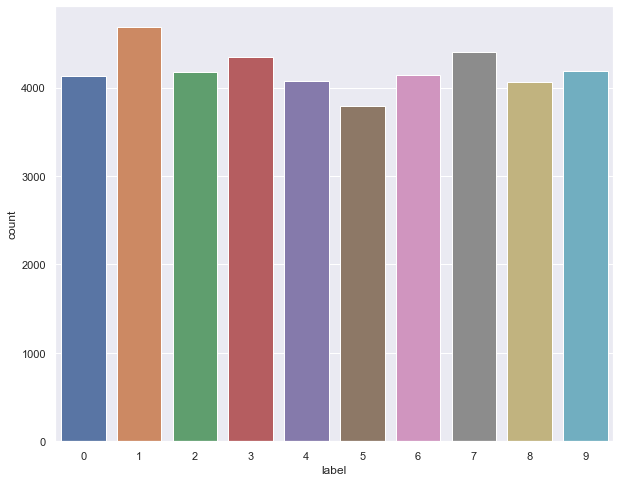

In [33]:
sns.set()
plt.figure(figsize = (10,8))
sns.countplot(x = data["label"])
plt.show()

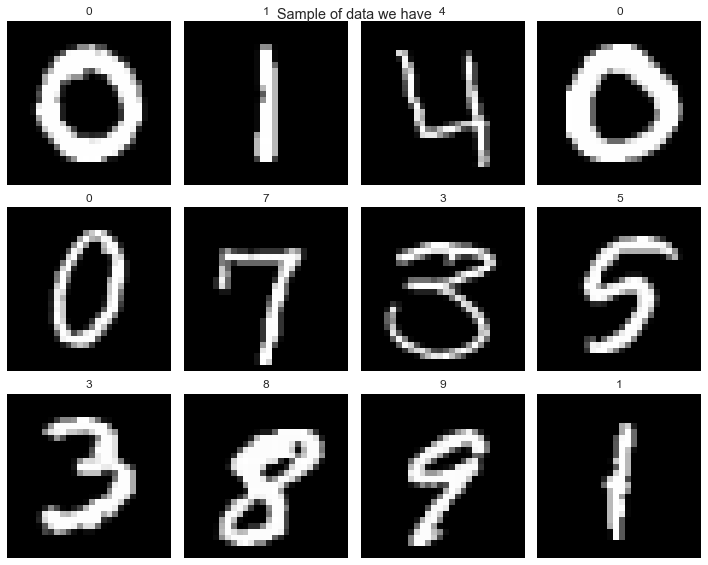

In [36]:
plt.figure(figsize = (10,8))
for i in range(1,13):
    plt.subplot(3,4,i)
    plt.imshow(features[i].reshape(28,28),cmap = "gray")
    plt.title(str(label[i]))
    plt.grid(False)
    plt.axis(False)
plt.suptitle("Sample of data we have")
plt.tight_layout()
plt.show()

# Preprocessing 

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features.reshape(-1,features.shape[1],1), label)

In [38]:
x_train.shape

(31500, 784, 1)

# Building our neural network

In [39]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(x_train.shape[1:])),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


# Training the neural network

In [40]:
history = model.fit(x_train, y_train, epochs = 10, validation_data = (x_test, y_test))

Train on 31500 samples, validate on 10500 samples
Epoch 1/10
31500/31500 [==============================] - 5s 157us/sample - loss: 4.0417 - acc: 0.7227 - val_loss: 0.7119 - val_acc: 0.8373
Epoch 2/10
31500/31500 [==============================] - 4s 133us/sample - loss: 0.7228 - acc: 0.8165 - val_loss: 0.5667 - val_acc: 0.8683
Epoch 3/10
31500/31500 [==============================] - 4s 127us/sample - loss: 0.5762 - acc: 0.8465 - val_loss: 0.4669 - val_acc: 0.8930
Epoch 4/10
31500/31500 [==============================] - 4s 129us/sample - loss: 0.5067 - acc: 0.8662 - val_loss: 0.4367 - val_acc: 0.8935
Epoch 5/10
31500/31500 [==============================] - 6s 178us/sample - loss: 0.4787 - acc: 0.8746 - val_loss: 0.3614 - val_acc: 0.9110
Epoch 6/10
31500/31500 [==============================] - 4s 142us/sample - loss: 0.4359 - acc: 0.8837 - val_loss: 0.3866 - val_acc: 0.9223
Epoch 7/10
31500/31500 [==============================] - 4s 137us/sample - loss: 0.4253 - acc: 0.8903 - val_l

# Evaluation

10500/10500 - 1s - loss: 0.3731 - acc: 0.9346


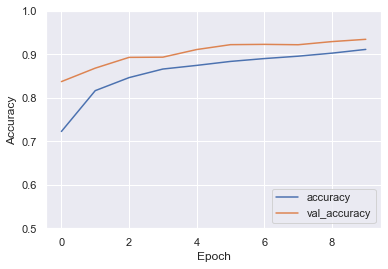

In [41]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)